Load necessary libraries

In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import math

Load first 409600 datapoints of clean ECG

In [17]:
data = scipy.io.loadmat("Clean ECG/220m.mat")
x = -data['val'][1,:409600]

Text(0.5, 0, 'sample number')

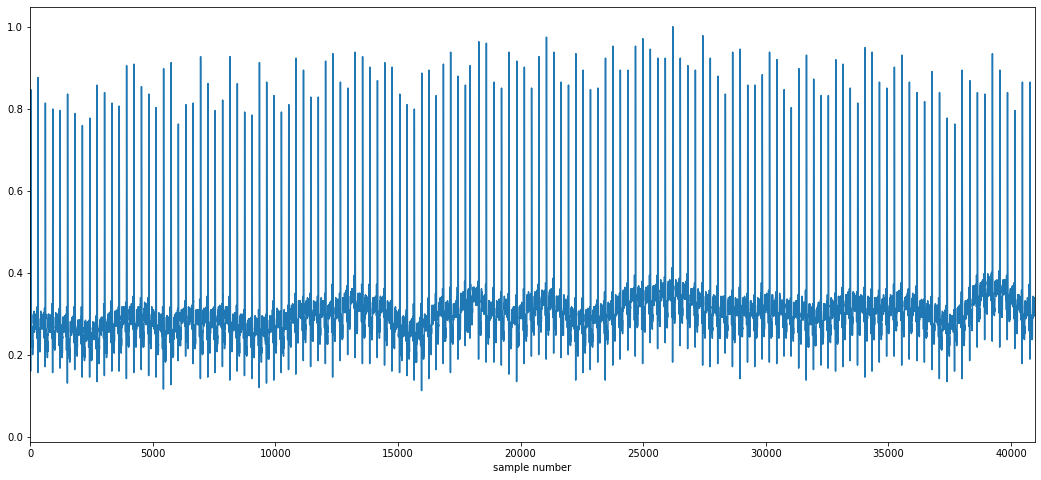

In [18]:
x = x/max(abs(min(x)),max(x)) #normalize the data

plt.figure(figsize=(18,8))
plt.plot(x)
plt.xlim(0*40960,1*40960)  
plt.xlabel('sample number')

In [21]:
np.savetxt("samples/220_full_409600samples.csv", x, delimiter=",", header='V')

In [22]:
#load the noise signals form MIT-BIH NST dataset
em_noise = np.fromfile('Noise/em.dat', dtype=int)
em_noise = em_noise[:409600]
#p = np.random.rand(409600)
#em_noise = np.multiply(p, em_noise)
em_noise = em_noise/max(em_noise)


ma_noise = np.fromfile('Noise/ma.dat', dtype=int)
ma_noise = ma_noise[:409600]
#p = np.random.rand(409600)
#ma_noise = np.multiply(p, ma_noise)
ma_noise = ma_noise/max(ma_noise)


bw_noise = np.fromfile('Noise/bw.dat', dtype=int)
bw_noise = bw_noise[:409600]
#p = np.random.rand(409600)
#bw_noise = np.multiply(p, bw_noise)
bw_noise = bw_noise/max(bw_noise)

We multiply the noise signals by different gain values to get our desired SNR(dB) level. As mentioned in section 3 in the paper, to prioritize muscle artifact noise, its gain value has been kept higher than that of others.

In [71]:
noise = 0.55*em_noise + 0.6*ma_noise + 0.2*bw_noise

noise = 5.27917*noise

SignalAndNoise = x + noise

Calculate the SNR value

In [72]:
10*(math.log((np.sum(x**2)/np.sum(noise**2))))

-30.000064555263577

(0.0, 40960.0)

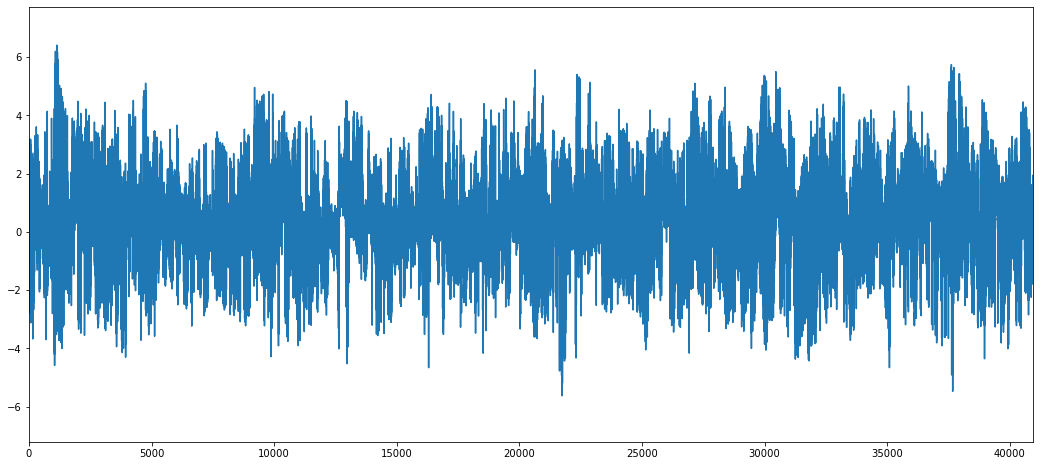

In [73]:
plt.figure(figsize=(18,8))
plt.plot(SignalAndNoise)
plt.xlim(0*40960,1*40960)

In [74]:
np.savetxt("samples/220_full_409600_-24.csv", SignalAndNoise, delimiter=",", header='V')